In [1]:
# imported libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

# local imports
import wrangle as w

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Exploration Working Notebook

In [2]:
import wrangle as w

# Generate dataframes and split data for exploration

In [ ]:
train, val, test, train_scaled, val_scaled, test_scaled, new_df, df_customers, df = w.wrangle_data()

In [28]:
# checking for subset shape
train.shape, val.shape, test.shape

((365551, 28), (78332, 28), (78333, 28))

# Cleaned & Prepped DataFrame

In [4]:
# cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522216 entries, 0 to 541908
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   invoice_no                     522216 non-null  object        
 1   stock_code                     522216 non-null  object        
 2   description                    522216 non-null  object        
 3   quantity                       522216 non-null  int64         
 4   invoice_date                   522216 non-null  datetime64[ns]
 5   unit_price                     522216 non-null  float64       
 6   customer_id                    522216 non-null  object        
 7   country                        522216 non-null  object        
 8   total_price                    522216 non-null  float64       
 9   invoice_date_day               522216 non-null  object        
 10  invoice_date_time              522216 non-null  object        
 11  invoi

In [30]:
# Checking for nulls
df.isnull().sum()

invoice_no                       0
stock_code                       0
description                      0
quantity                         0
invoice_date                     0
unit_price                       0
customer_id                      0
country                          0
total_price                      0
invoice_date_day                 0
invoice_date_time                0
invoice_year                     0
invoice_month                    0
invoice_month_name               0
invoice_day                      0
invoice_day_name                 0
invoice_day_of_week              0
invoice_week_of_year             0
invoice_hour                     0
quantity_outliers                0
unit_price_outliers              0
total_price_outliers             0
invoice_year_outliers            0
invoice_month_outliers           0
invoice_day_outliers             0
invoice_day_of_week_outliers     0
invoice_week_of_year_outliers    0
invoice_hour_outliers            0
dtype: int64

In [29]:
df.head(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,invoice_date_day,...,invoice_hour,quantity_outliers,unit_price_outliers,total_price_outliers,invoice_year_outliers,invoice_month_outliers,invoice_day_outliers,invoice_day_of_week_outliers,invoice_week_of_year_outliers,invoice_hour_outliers
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12-01,...,8,0,0,0,1,0,0,0,0,0


# Aggregated and groupedby dataframe


In [27]:
new_df

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4326 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_date  4326 non-null   int64  
 1   invoice_no    4326 non-null   int64  
 2   total_price   4326 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.2+ KB


In [8]:
train.columns.to_list()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'total_price',
 'invoice_date_day',
 'invoice_date_time',
 'invoice_year',
 'invoice_month',
 'invoice_month_name',
 'invoice_day',
 'invoice_day_name',
 'invoice_day_of_week',
 'invoice_week_of_year',
 'invoice_hour',
 'quantity_outliers',
 'unit_price_outliers',
 'total_price_outliers',
 'invoice_year_outliers',
 'invoice_month_outliers',
 'invoice_day_outliers',
 'invoice_day_of_week_outliers',
 'invoice_week_of_year_outliers',
 'invoice_hour_outliers']

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365551 entries, 426075 to 126882
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   invoice_no                     365551 non-null  object        
 1   stock_code                     365551 non-null  object        
 2   description                    365551 non-null  object        
 3   quantity                       365551 non-null  int64         
 4   invoice_date                   365551 non-null  datetime64[ns]
 5   unit_price                     365551 non-null  float64       
 6   customer_id                    365551 non-null  object        
 7   country                        365551 non-null  object        
 8   total_price                    365551 non-null  float64       
 9   invoice_date_day               365551 non-null  object        
 10  invoice_date_time              365551 non-null  object        
 11  

In [10]:
train.invoice_month_name.value_counts()

invoice_month_name
November     57630
December     46070
October      40975
September    34073
July         26583
May          24914
June         24760
March        24673
August       23797
January      23520
April        19989
February     18567
Name: count, dtype: int64

In [11]:
month_counts = train.invoice_month_name.value_counts()

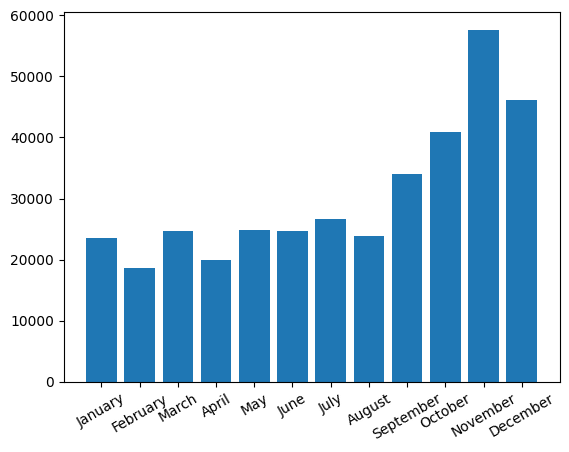

In [12]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Sort the month counts according to the specified order
sorted_month_counts = month_counts.reindex(month_order)

# Plot the bar chart
plt.bar(x=sorted_month_counts.index, height=sorted_month_counts.values)
plt.xticks(rotation=30)
plt.show()


In [13]:
train.invoice_day_name.value_counts()

invoice_day_name
Thursday     69560
Tuesday      68743
Monday       64027
Wednesday    63680
Friday       55220
Sunday       44321
Name: count, dtype: int64

In [14]:
train.invoice_month_name

426075     October
278193        July
531339    December
288076      August
531421    December
            ...   
270148        July
380658     October
137343       March
153119       April
126882       March
Name: invoice_month_name, Length: 365551, dtype: object

In [15]:
train.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,invoice_date_day,...,invoice_hour,quantity_outliers,unit_price_outliers,total_price_outliers,invoice_year_outliers,invoice_month_outliers,invoice_day_outliers,invoice_day_of_week_outliers,invoice_week_of_year_outliers,invoice_hour_outliers
426075,573343,22086,PAPER CHAIN KIT 50'S CHRISTMAS,3,2011-10-30 11:59:00,2.95,13566,United Kingdom,8.85,2011-10-30,...,11,0,0,0,0,0,0,0,0,0
278193,561209,22297,HEART IVORY TRELLIS SMALL,1,2011-07-25 16:57:00,2.46,0,United Kingdom,2.46,2011-07-25,...,16,0,0,0,0,0,0,0,0,0
531339,580915,23208,LUNCH BAG VINTAGE LEAF DESIGN,10,2011-12-06 13:45:00,1.65,17705,United Kingdom,16.50,2011-12-06,...,13,0,0,0,0,0,0,0,0,0
288076,562129,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",4,2011-08-03 09:09:00,4.95,13186,United Kingdom,19.80,2011-08-03,...,9,0,0,0,0,0,0,0,0,0
531421,580955,23597,PAPER BUNTING PAISLEY PARK,6,2011-12-06 14:22:00,2.95,12442,Spain,17.70,2011-12-06,...,14,0,0,0,0,0,0,0,0,0


In [16]:
train.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,365551.0,10.222355,1.0,1.0,3.0,11.0,12540.0,41.842003
invoice_date,365551,2011-07-05 00:12:14.365163520,2010-12-01 08:26:00,2011-03-28 12:35:00,2011-07-20 16:12:00,2011-10-19 13:58:00,2011-12-09 12:50:00,NaN
unit_price,365551.0,3.274478,-11062.06,1.25,2.08,4.13,11062.06,33.167279
total_price,365551.0,18.652299,-11062.06,3.75,9.9,17.7,11062.06,68.149364
invoice_year,365551.0,2010.921398,2010.0,2011.0,2011.0,2011.0,2011.0,0.269117
invoice_month,365551.0,7.57047,1.0,5.0,8.0,11.0,12.0,3.506139
invoice_day,365551.0,15.013653,1.0,7.0,15.0,22.0,31.0,8.659922
invoice_day_of_week,365551.0,2.439028,0.0,1.0,2.0,4.0,6.0,1.852124
invoice_week_of_year,365551.0,30.802101,1.0,18.0,34.0,45.0,51.0,15.135593
invoice_hour,365551.0,13.079942,7.0,11.0,13.0,15.0,20.0,2.4373


In [17]:
train[['quantity', 'unit_price', 'total_price']].head()

,quantity,unit_price,total_price
426075,3,2.95,8.85
278193,1,2.46,2.46
531339,10,1.65,16.50
288076,4,4.95,19.80
531421,6,2.95,17.70


In [18]:
train_scaled.shape, val_scaled.shape, test_scaled.shape

((365551, 28), (78332, 28), (78333, 28))

In [19]:
train_scaled.head(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,invoice_date_day,...,invoice_hour,quantity_outliers,unit_price_outliers,total_price_outliers,invoice_year_outliers,invoice_month_outliers,invoice_day_outliers,invoice_day_of_week_outliers,invoice_week_of_year_outliers,invoice_hour_outliers
426075,573343,22086,PAPER CHAIN KIT 50'S CHRISTMAS,0.000160,2011-10-30 11:59:00,0.500133,13566,United Kingdom,0.500400,2011-10-30,...,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278193,561209,22297,HEART IVORY TRELLIS SMALL,0.000000,2011-07-25 16:57:00,0.500111,0,United Kingdom,0.500111,2011-07-25,...,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531339,580915,23208,LUNCH BAG VINTAGE LEAF DESIGN,0.000718,2011-12-06 13:45:00,0.500075,17705,United Kingdom,0.500746,2011-12-06,...,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365551 entries, 426075 to 126882
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   invoice_no                     365551 non-null  object        
 1   stock_code                     365551 non-null  object        
 2   description                    365551 non-null  object        
 3   quantity                       365551 non-null  float64       
 4   invoice_date                   365551 non-null  datetime64[ns]
 5   unit_price                     365551 non-null  float64       
 6   customer_id                    365551 non-null  object        
 7   country                        365551 non-null  object        
 8   total_price                    365551 non-null  float64       
 9   invoice_date_day               365551 non-null  object        
 10  invoice_date_time              365551 non-null  object        
 11  

In [20]:
train_scaled.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,365551.0,0.000735,0.0,0.0,0.00016,0.000798,1.0,0.003337
invoice_date,365551,2011-07-05 00:12:14.365163520,2010-12-01 08:26:00,2011-03-28 12:35:00,2011-07-20 16:12:00,2011-10-19 13:58:00,2011-12-09 12:50:00,NaN
unit_price,365551.0,0.500148,0.0,0.500056,0.500094,0.500187,1.0,0.001499
total_price,365551.0,0.500843,0.0,0.500169,0.500447,0.5008,1.0,0.00308
invoice_year,365551.0,0.921398,0.0,1.0,1.0,1.0,1.0,0.269117
invoice_month,365551.0,0.597315,0.0,0.363636,0.636364,0.909091,1.0,0.31874
invoice_day,365551.0,0.467122,0.0,0.2,0.466667,0.7,1.0,0.288664
invoice_day_of_week,365551.0,0.406505,0.0,0.166667,0.333333,0.666667,1.0,0.308687
invoice_week_of_year,365551.0,0.596042,0.0,0.34,0.66,0.88,1.0,0.302712
invoice_hour,365551.0,0.467688,0.0,0.307692,0.461538,0.615385,1.0,0.187485


In [21]:
train_scaled.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,365551.0,0.000735,0.0,0.0,0.00016,0.000798,1.0,0.003337
invoice_date,365551,2011-07-05 00:12:14.365163520,2010-12-01 08:26:00,2011-03-28 12:35:00,2011-07-20 16:12:00,2011-10-19 13:58:00,2011-12-09 12:50:00,NaN
unit_price,365551.0,0.500148,0.0,0.500056,0.500094,0.500187,1.0,0.001499
total_price,365551.0,0.500843,0.0,0.500169,0.500447,0.5008,1.0,0.00308
invoice_year,365551.0,0.921398,0.0,1.0,1.0,1.0,1.0,0.269117
invoice_month,365551.0,0.597315,0.0,0.363636,0.636364,0.909091,1.0,0.31874
invoice_day,365551.0,0.467122,0.0,0.2,0.466667,0.7,1.0,0.288664
invoice_day_of_week,365551.0,0.406505,0.0,0.166667,0.333333,0.666667,1.0,0.308687
invoice_week_of_year,365551.0,0.596042,0.0,0.34,0.66,0.88,1.0,0.302712
invoice_hour,365551.0,0.467688,0.0,0.307692,0.461538,0.615385,1.0,0.187485


In [31]:
train_scaled.columns.to_list()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'total_price',
 'invoice_date_day',
 'invoice_date_time',
 'invoice_year',
 'invoice_month',
 'invoice_month_name',
 'invoice_day',
 'invoice_day_name',
 'invoice_day_of_week',
 'invoice_week_of_year',
 'invoice_hour',
 'quantity_outliers',
 'unit_price_outliers',
 'total_price_outliers',
 'invoice_year_outliers',
 'invoice_month_outliers',
 'invoice_day_outliers',
 'invoice_day_of_week_outliers',
 'invoice_week_of_year_outliers',
 'invoice_hour_outliers']

In [22]:
train_scaled.head()  

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,invoice_date_day,...,invoice_hour,quantity_outliers,unit_price_outliers,total_price_outliers,invoice_year_outliers,invoice_month_outliers,invoice_day_outliers,invoice_day_of_week_outliers,invoice_week_of_year_outliers,invoice_hour_outliers
426075,573343,22086,PAPER CHAIN KIT 50'S CHRISTMAS,0.000160,2011-10-30 11:59:00,0.500133,13566,United Kingdom,0.500400,2011-10-30,...,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278193,561209,22297,HEART IVORY TRELLIS SMALL,0.000000,2011-07-25 16:57:00,0.500111,0,United Kingdom,0.500111,2011-07-25,...,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531339,580915,23208,LUNCH BAG VINTAGE LEAF DESIGN,0.000718,2011-12-06 13:45:00,0.500075,17705,United Kingdom,0.500746,2011-12-06,...,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288076,562129,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",0.000239,2011-08-03 09:09:00,0.500224,13186,United Kingdom,0.500895,2011-08-03,...,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531421,580955,23597,PAPER BUNTING PAISLEY PARK,0.000399,2011-12-06 14:22:00,0.500133,12442,Spain,0.500800,2011-12-06,...,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## New features below based on features present:

In [23]:
train.total_price.value_counts()

total_price
15.00      14081
1.25        6629
2.46        6486
17.70       6314
4.13        6064
           ...  
66.36          1
1668.59        1
94.64          1
68.25          1
307.56         1
Name: count, Length: 3645, dtype: int64

In [24]:
train.total_price.head()

426075     8.85
278193     2.46
531339    16.50
288076    19.80
531421    17.70
Name: total_price, dtype: float64

## Can we see patterns, find signals in the data?

## What features are driving the outcome?

## Are there other features we can construct that have stronger relationships?

## Visualization and statistical testing

## I want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, etc.).

## Lets take a look at the distributions of all features in the data

## What is the distribution of scaled numerical features?

Cannot create histogram. The data type of invoice_no is not numeric.
Cannot create histogram. The data type of stock_code is not numeric.
Cannot create histogram. The data type of description is not numeric.


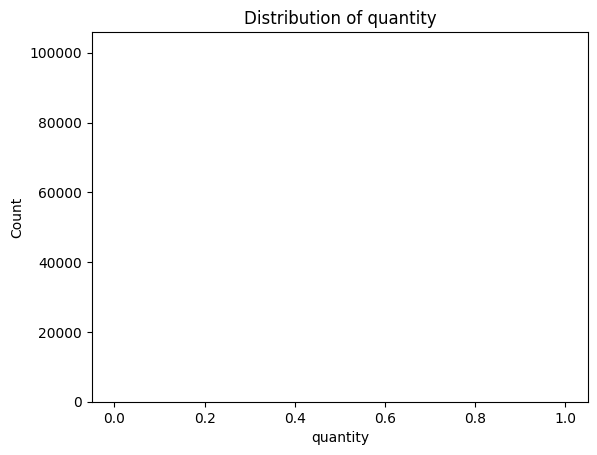

Cannot create histogram. The data type of invoice_date is not numeric.


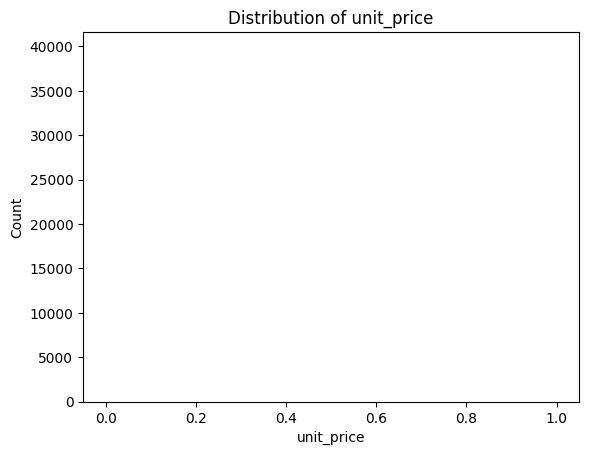

Cannot create histogram. The data type of customer_id is not numeric.
Cannot create histogram. The data type of country is not numeric.


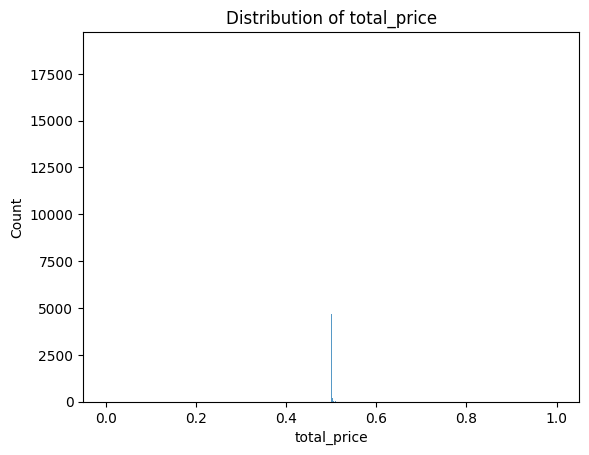

Cannot create histogram. The data type of invoice_date_day is not numeric.
Cannot create histogram. The data type of invoice_date_time is not numeric.


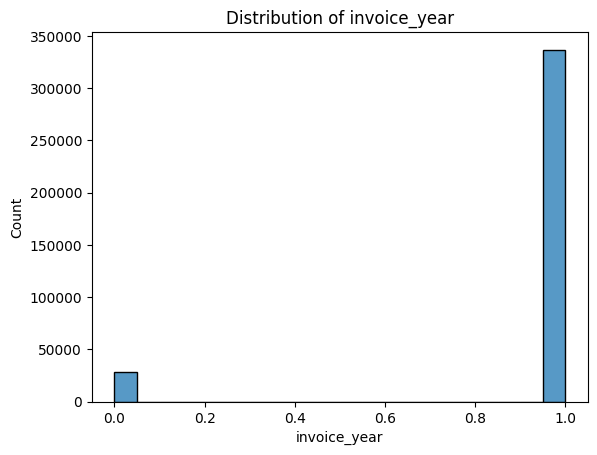

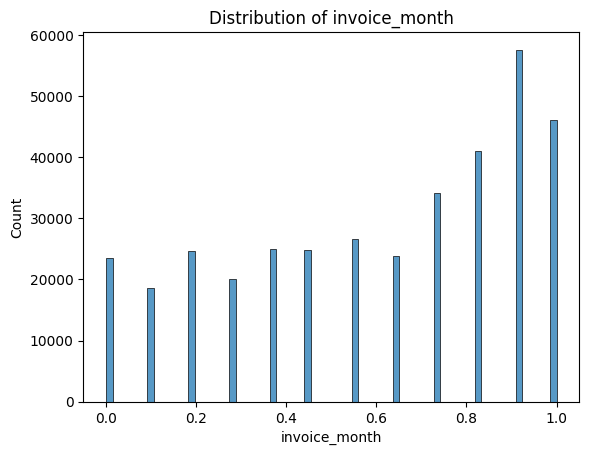

Cannot create histogram. The data type of invoice_month_name is not numeric.


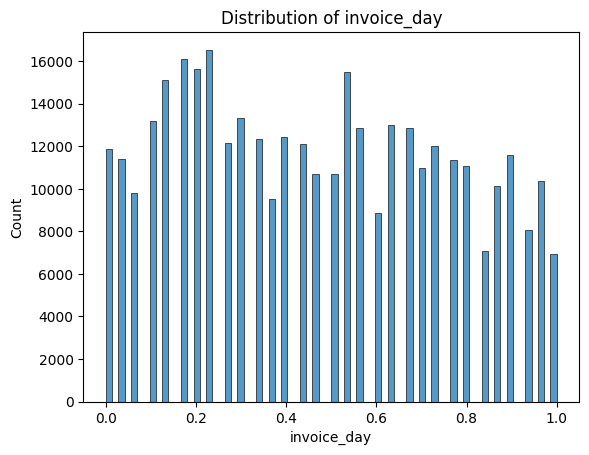

Cannot create histogram. The data type of invoice_day_name is not numeric.


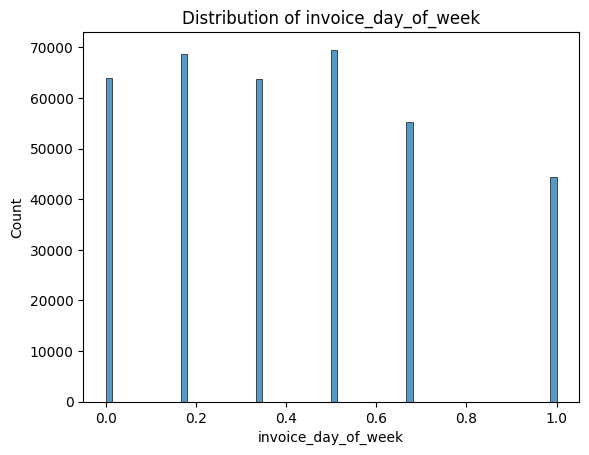

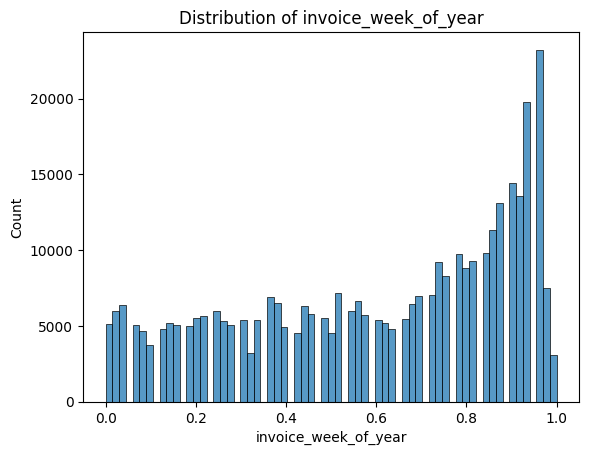

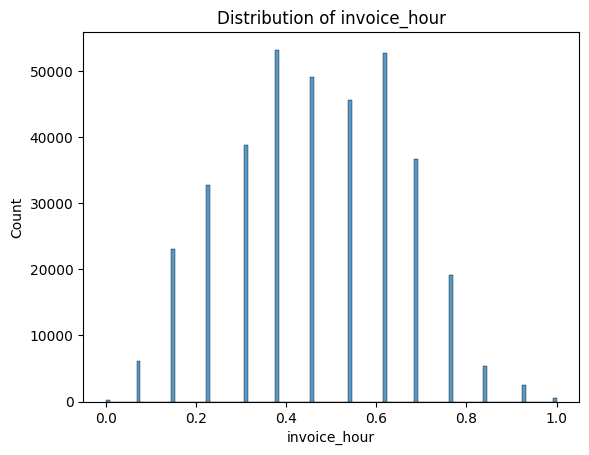

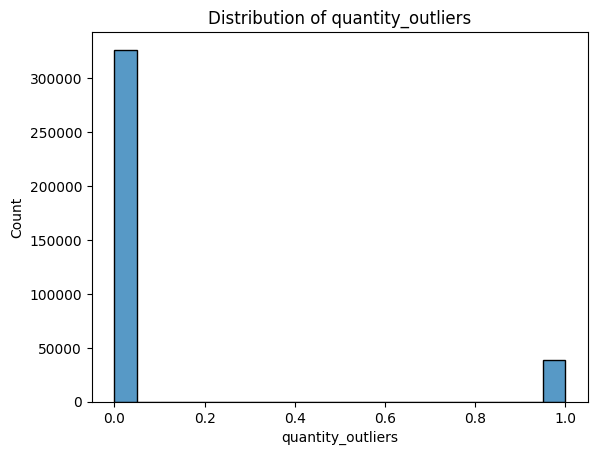

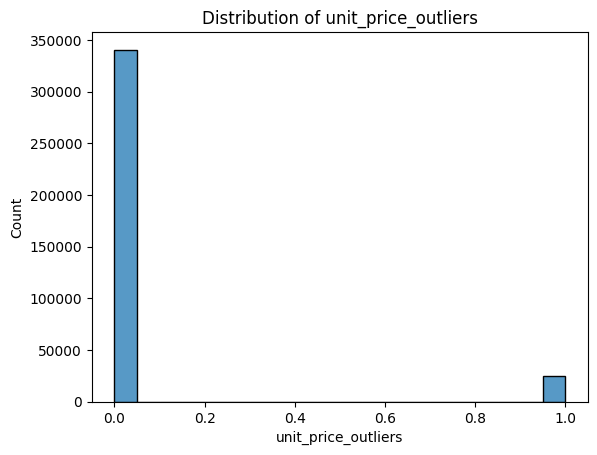

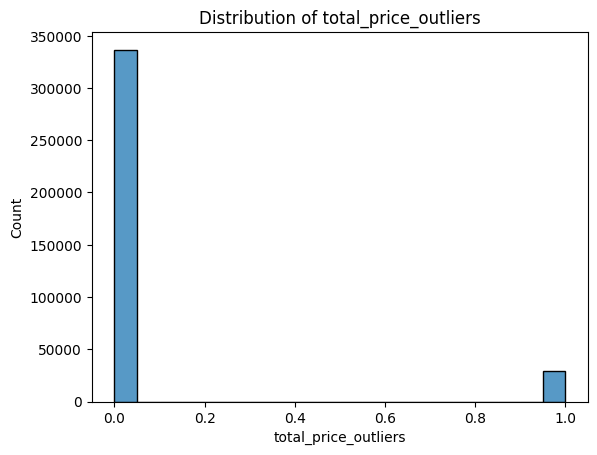

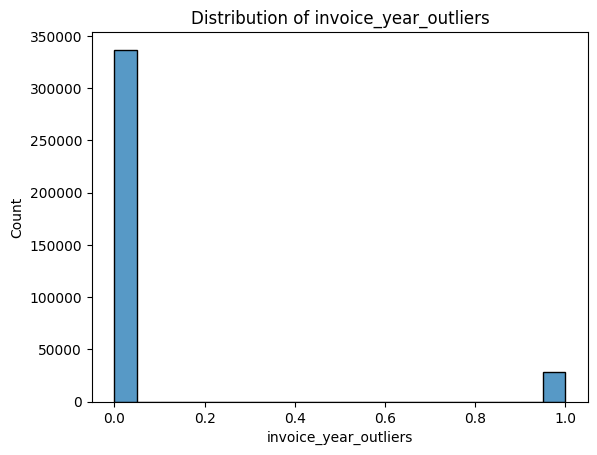

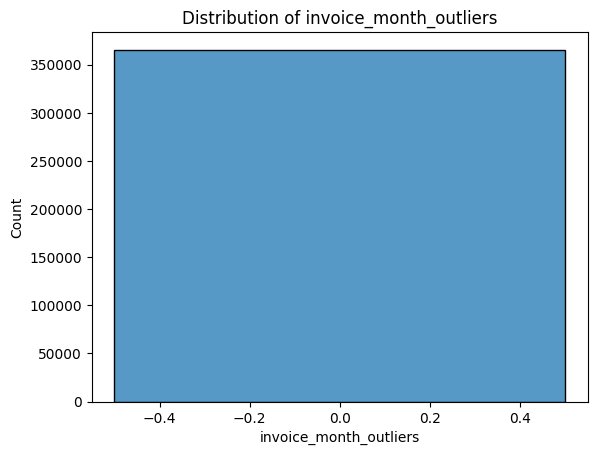

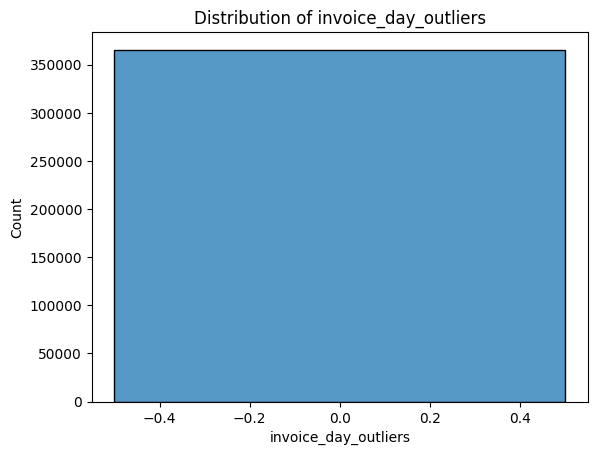

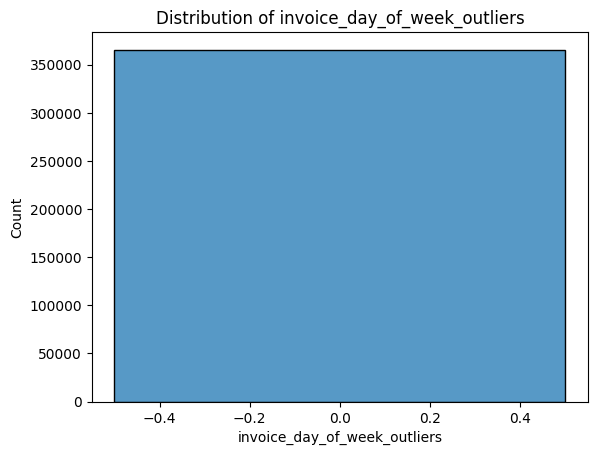

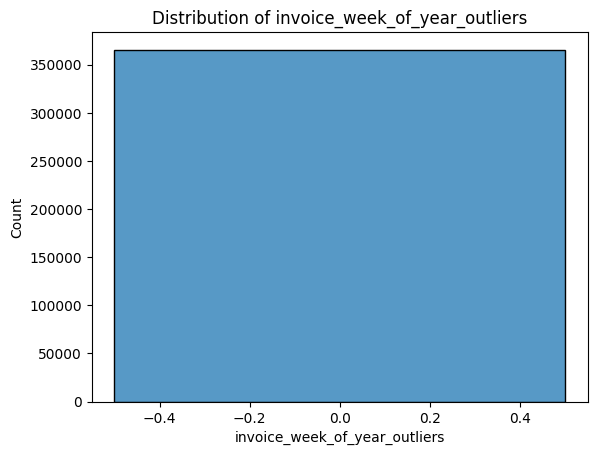

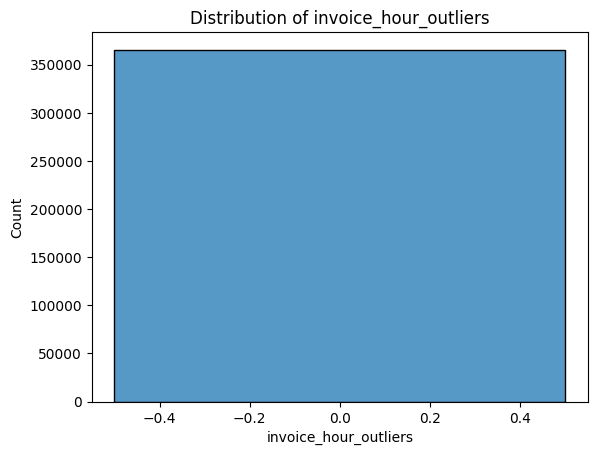

In [41]:
# Loop through each column in the list
for col_name in col:
    # Check the data type of the current column
    if train_scaled[col_name].dtype.kind in 'biufc':
        # Create histogram if the data type is numeric
        plt.figure()
        plt.title(f'Distribution of {col_name}')
        sns.histplot(data=train_scaled, x=col_name)
        plt.show()
    else:
        print(f"Cannot create histogram. The data type of {col_name} is not numeric.")

## Categorical data

## What is the distribution of categorical features?

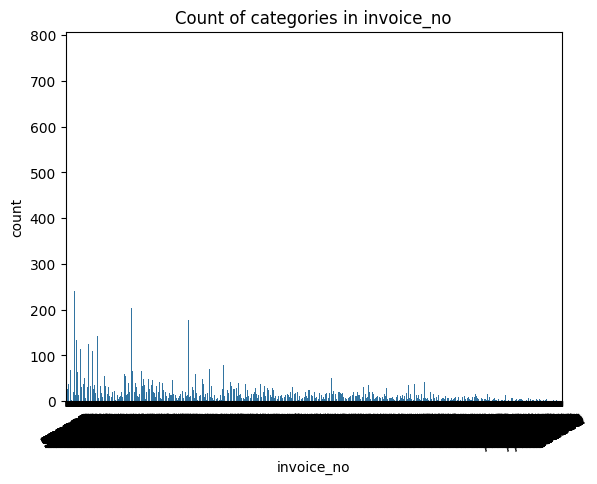

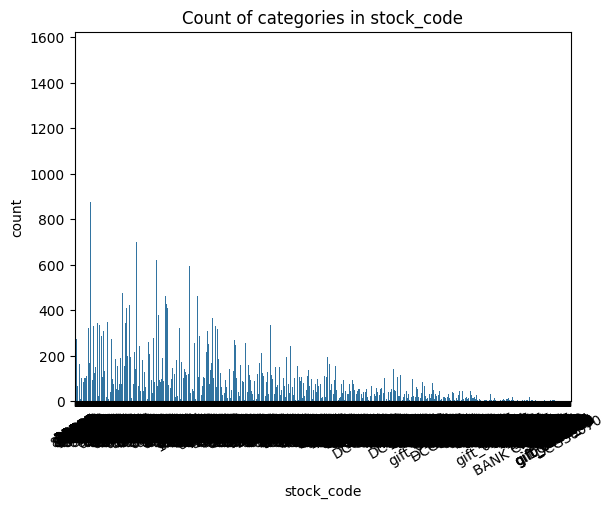

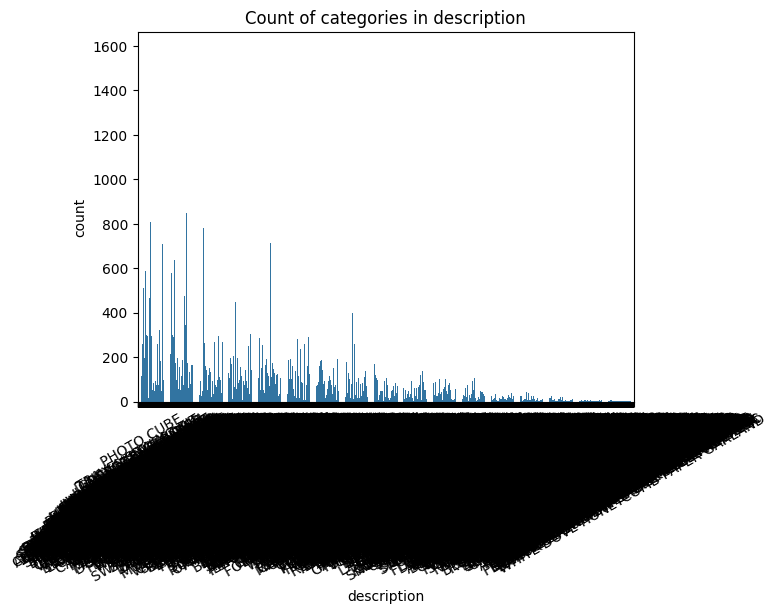

Cannot create countplot. The data type of quantity is numeric.


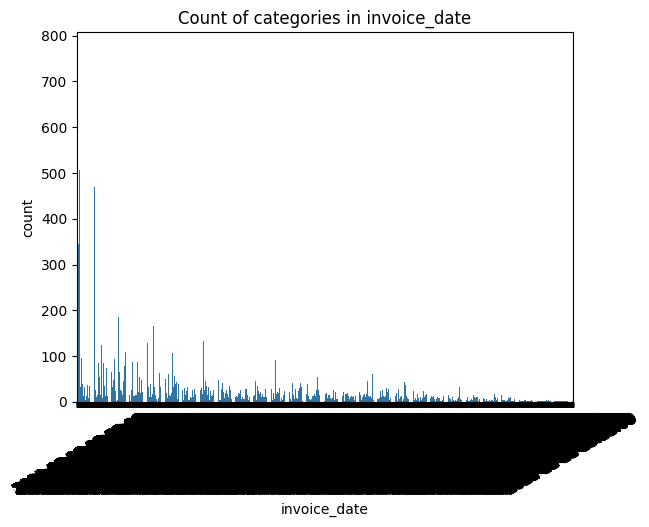

Cannot create countplot. The data type of unit_price is numeric.


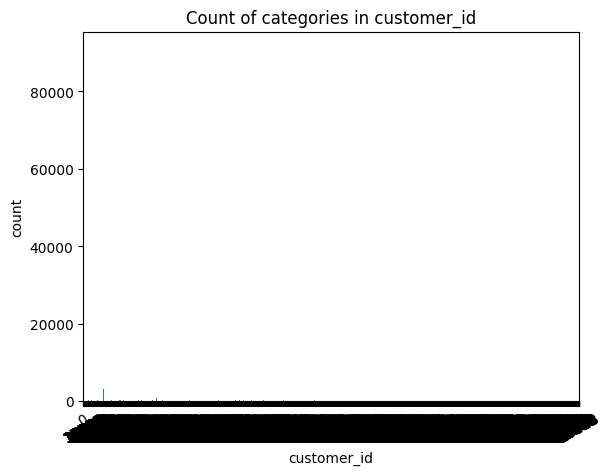

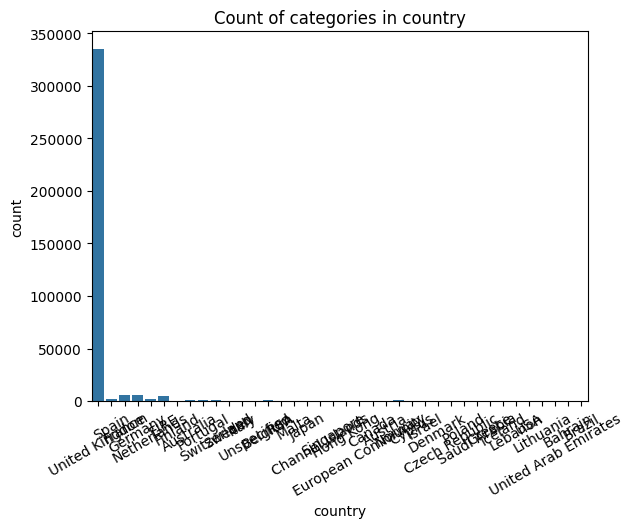

Cannot create countplot. The data type of total_price is numeric.


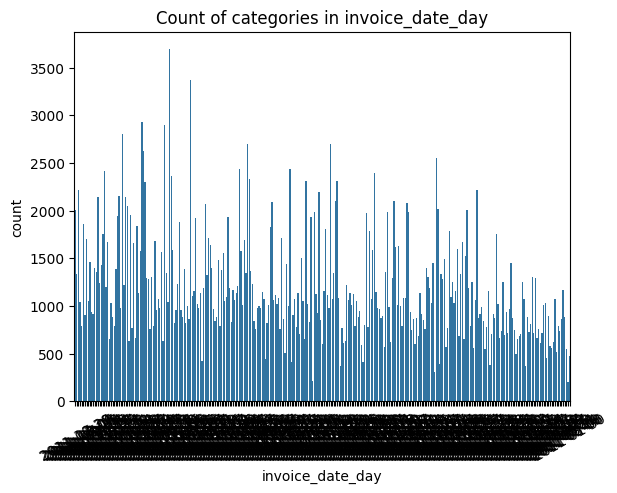

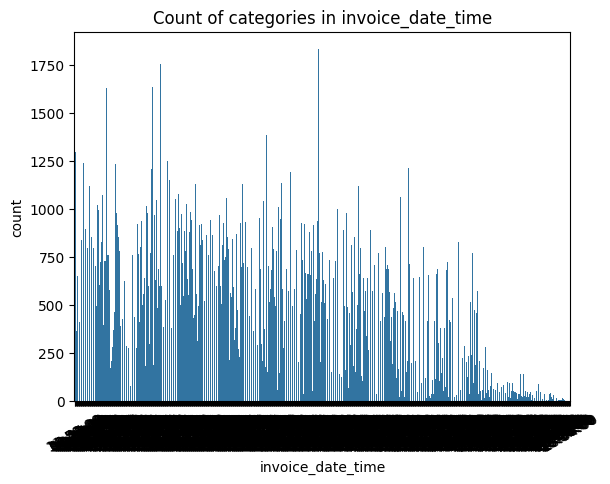

Cannot create countplot. The data type of invoice_year is numeric.
Cannot create countplot. The data type of invoice_month is numeric.


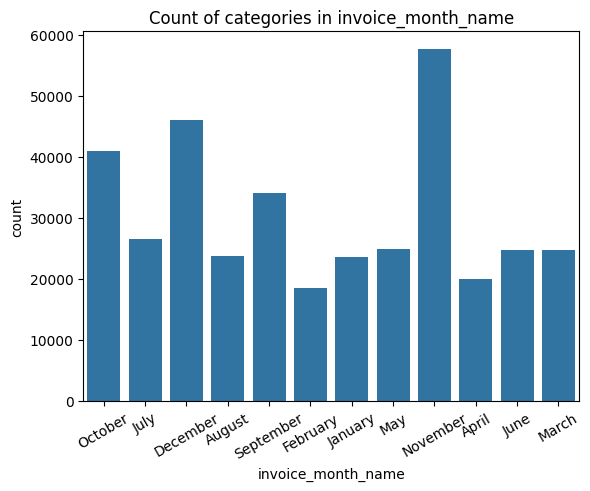

Cannot create countplot. The data type of invoice_day is numeric.


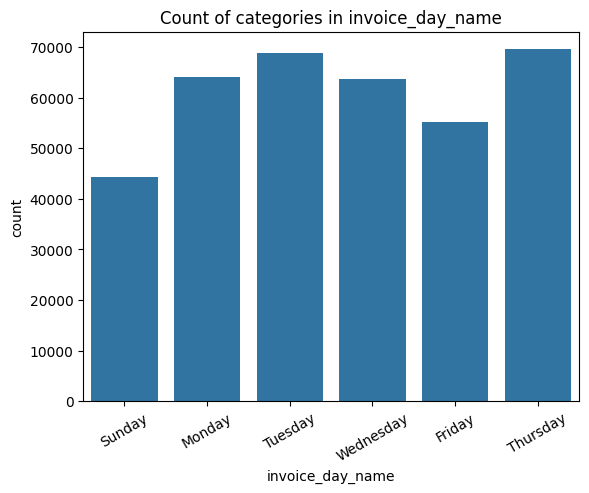

Cannot create countplot. The data type of invoice_day_of_week is numeric.
Cannot create countplot. The data type of invoice_week_of_year is numeric.
Cannot create countplot. The data type of invoice_hour is numeric.
Cannot create countplot. The data type of quantity_outliers is numeric.
Cannot create countplot. The data type of unit_price_outliers is numeric.
Cannot create countplot. The data type of total_price_outliers is numeric.
Cannot create countplot. The data type of invoice_year_outliers is numeric.
Cannot create countplot. The data type of invoice_month_outliers is numeric.
Cannot create countplot. The data type of invoice_day_outliers is numeric.
Cannot create countplot. The data type of invoice_day_of_week_outliers is numeric.
Cannot create countplot. The data type of invoice_week_of_year_outliers is numeric.
Cannot create countplot. The data type of invoice_hour_outliers is numeric.


In [45]:
# Loop through each column in the list
for col_name in col:
    # Check if the current column is categorical (non-numeric)
    if train_scaled[col_name].dtype.kind not in 'biufc':
        # Create countplot if the data type is non-numeric (categorical)
        plt.figure()
        plt.title(f'Count of categories in {col_name}')
        sns.countplot(data=train_scaled, x=col_name)
        plt.xticks(rotation=30)  # Rotate x-axis labels for better readability if needed
        plt.show()
    else:
        print(f"Cannot create countplot. The data type of {col_name} is numeric.")

# What is the correlation between all numerical features?

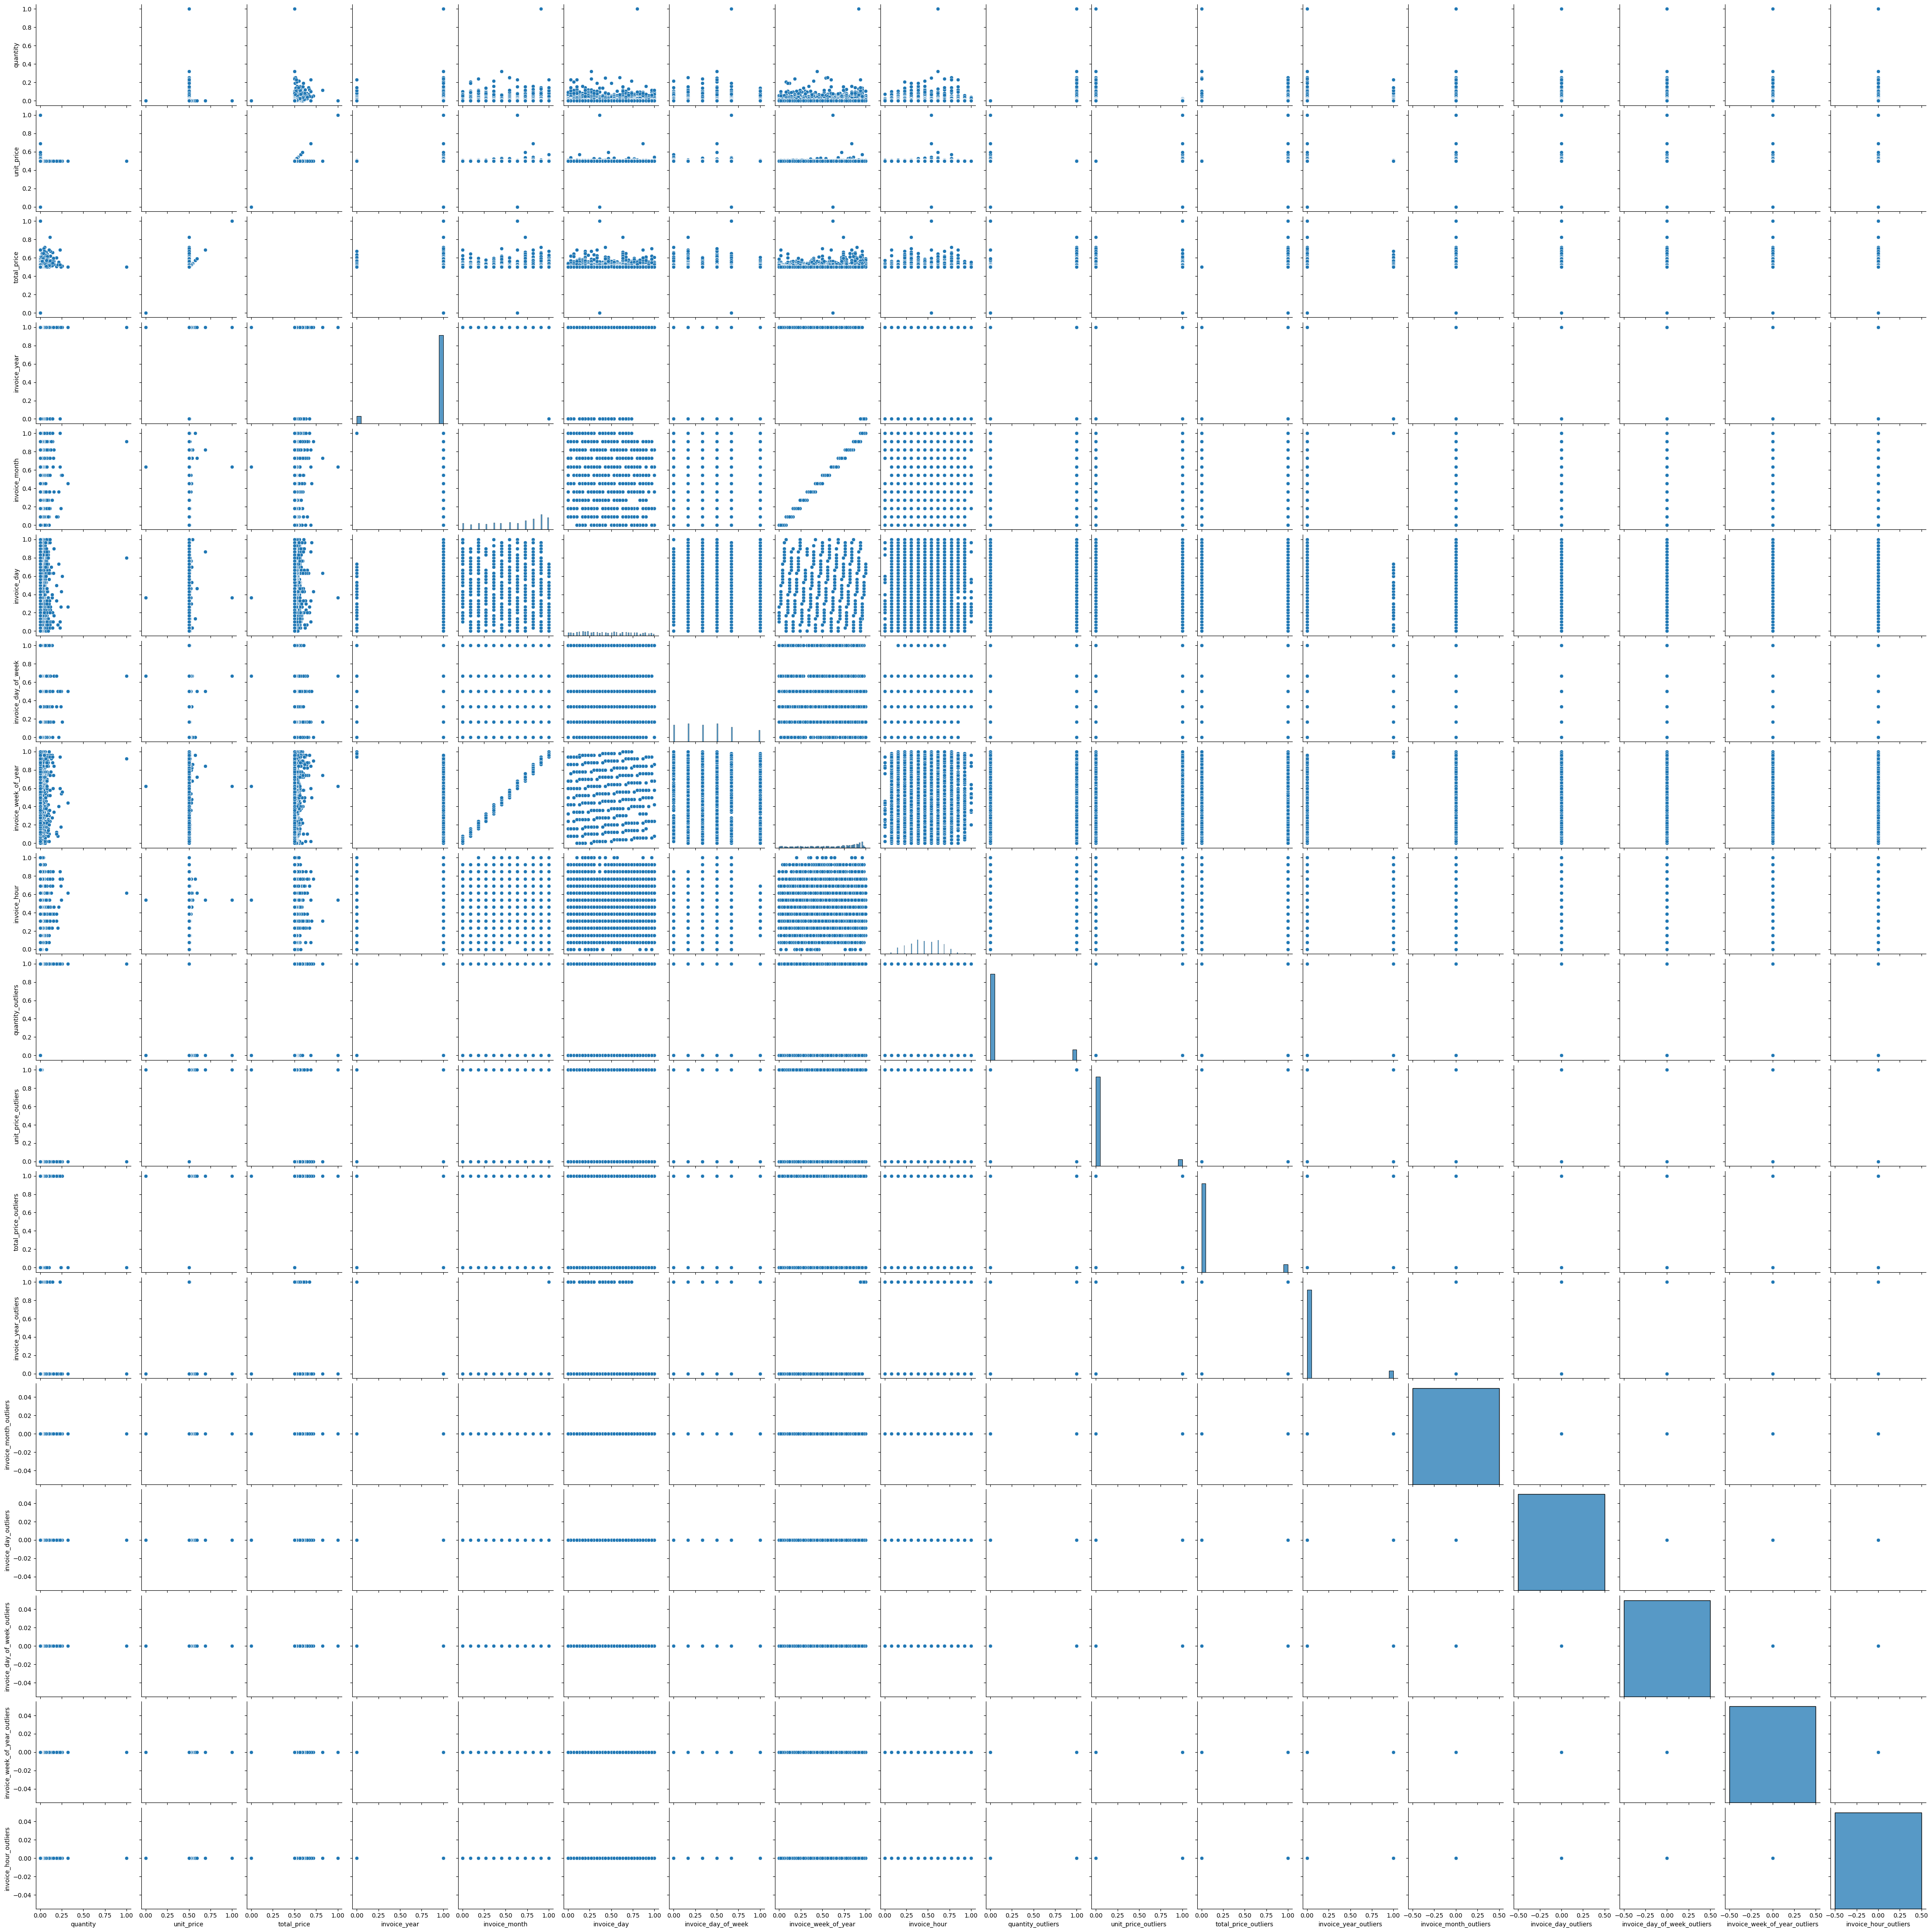

In [42]:
sns.pairplot(data = train_scaled, corner=False)

# what is the `country` count distributions within this data?

In [43]:
country_cnts = train_scaled.country.value_counts()
country_cnts = pd.DataFrame(country_cnts).reset_index()
country_cnts = country_cnts[country_cnts['count'] > 1000]

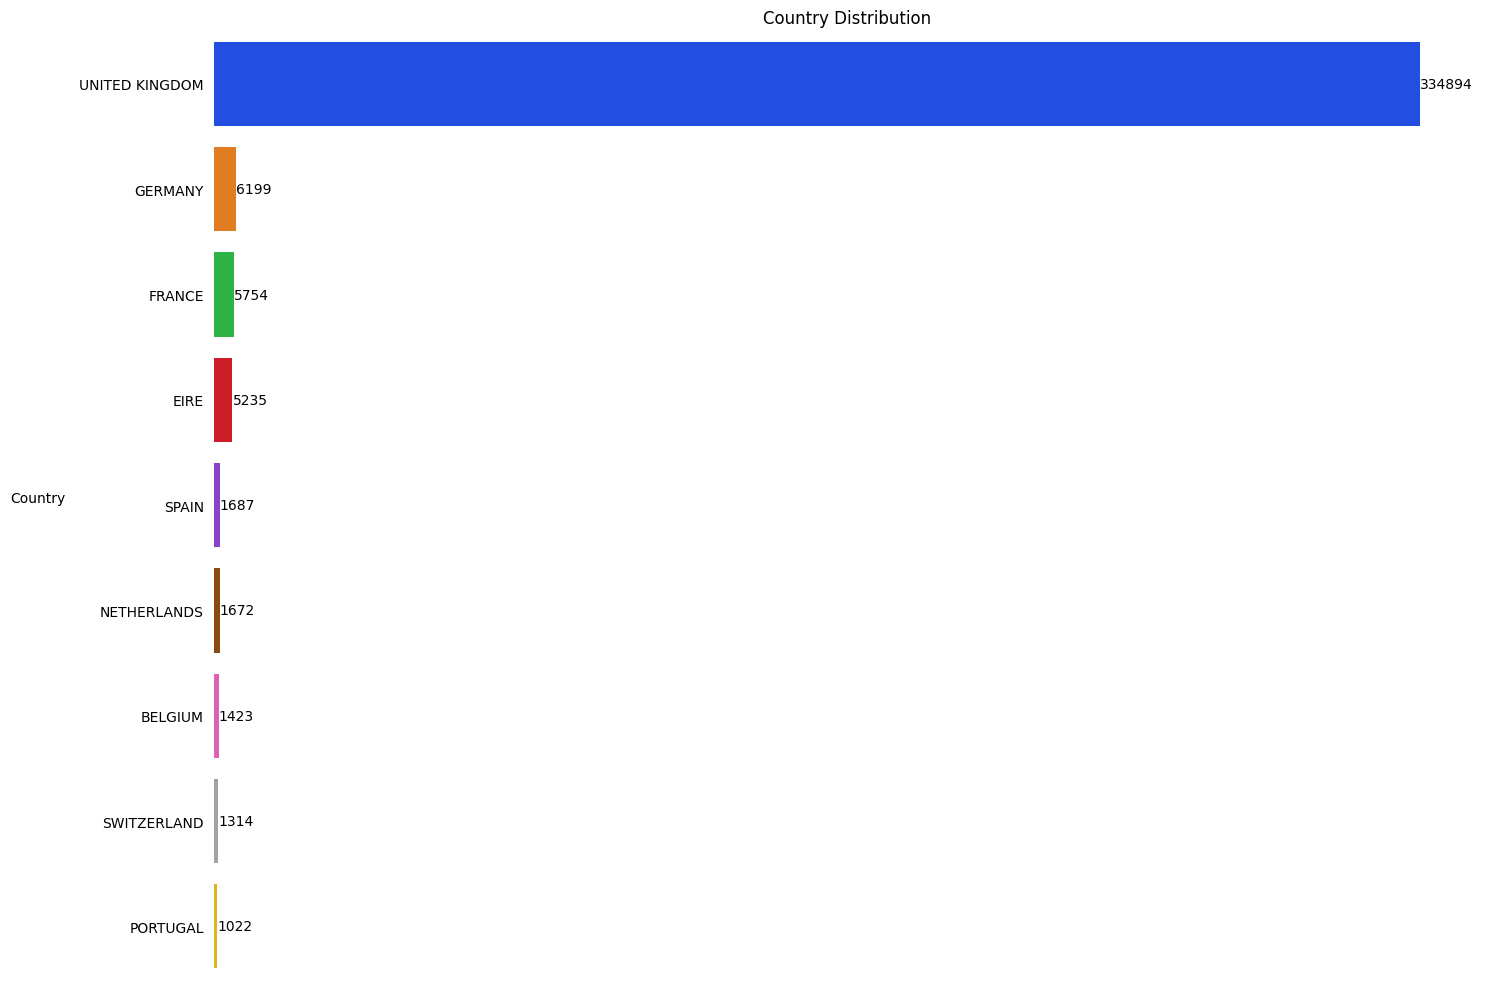

In [44]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()

* The data is comprised of alot of infmormation relating to the United Kingdom

In [52]:
train_scaled.columns.to_list()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'total_price',
 'invoice_date_day',
 'invoice_date_time',
 'invoice_year',
 'invoice_month',
 'invoice_month_name',
 'invoice_day',
 'invoice_day_name',
 'invoice_day_of_week',
 'invoice_week_of_year',
 'invoice_hour',
 'quantity_outliers',
 'unit_price_outliers',
 'total_price_outliers',
 'invoice_year_outliers',
 'invoice_month_outliers',
 'invoice_day_outliers',
 'invoice_day_of_week_outliers',
 'invoice_week_of_year_outliers',
 'invoice_hour_outliers']

## How does `quantity` vary with `customer_id` by country?

<Figure size 1000x600 with 0 Axes>

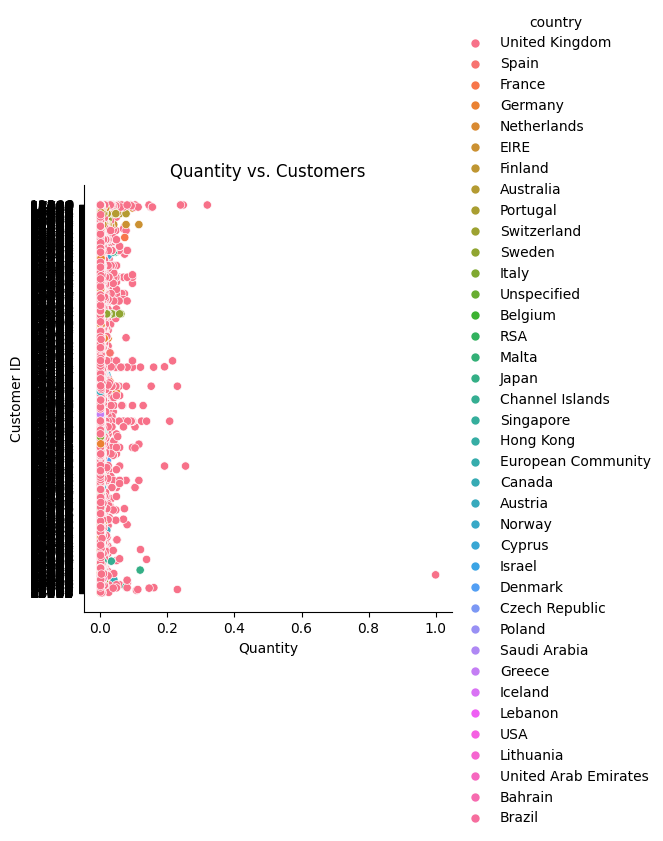

In [53]:
plt.figure(figsize=(10, 6))
sns.relplot(x='quantity', y='customer_id', hue='country', data=train_scaled)
plt.title('Quantity vs. Customers')
plt.xlabel('Quantity')
plt.ylabel('Customer ID')
plt.show()

## how about `unit_price` and `customer_id`?

<Figure size 1000x600 with 0 Axes>

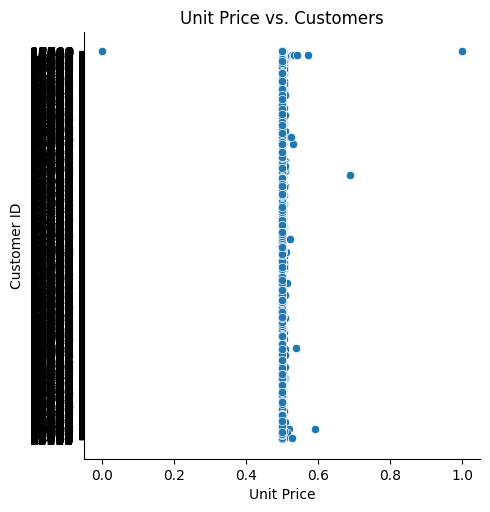

In [49]:
plt.figure(figsize=(10, 6))
sns.relplot(x='unit_price', y='customer_id', data=train_scaled)
plt.title('Unit Price vs. Customers')
plt.xlabel('Unit Price')
plt.ylabel('Customer ID')
plt.show()

## Scatter plot of  `total_price` and `quantity`

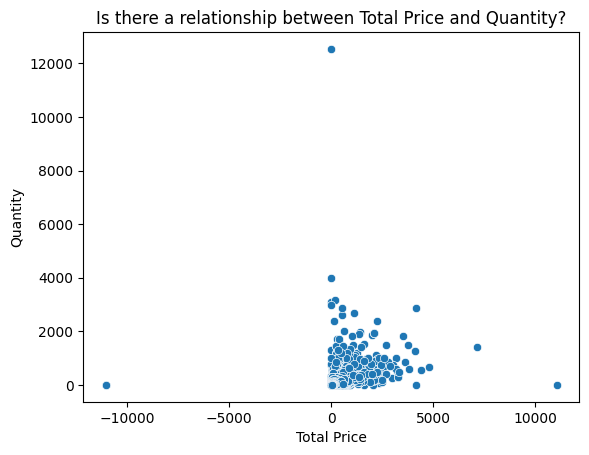

In [48]:
# plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_price', y='quantity', data=train)
plt.title('Is there a relationship between Total Price and Quantity?')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.show()

# -----------------------------------------------------------------

# How would scaling and normalizing features aid in getting a better visualization of distribution that exist within this dataset?

A data split and then scaling the train subset aided in providing a better visual and distribution of the data.

# Code added to prep function to handle negative values:

In [ ]:
# df['quantity'] = df['quantity'].apply(lambda x: max(x, 0))
    
# df['unit_price'] = df['unit_price'].apply(lambda x: max(x, 0))

# -----------------------------------------------------------------

## I'm going to bin quantities:

In [ ]:
train['quantity_bin'] = pd.cut(train.quantity, [0, 10, 20, 30, 40, 50, 10000])

train.head()

## How does quantity vary from total_price?

In [ ]:
sns.barplot(x='quantity_bin', y='total_price', data=train)
plt.title('Is there a relationship between Total Price and Quantity?')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

In [ ]:
train.columns.tolist()

In [ ]:
# Create bins for the 'quantity' feature
train['quantity_bin'] = pd.cut(train.quantity, [0, 10, 20, 30, 40, 50, 10000])

# Optionally, assign labels to each bin for easier interpretation
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']
train['quantity_bin'] = pd.cut(train.quantity, bins=[0, 10, 20, 30, 40, 50, 10000], labels=bin_labels)

# Select relevant features for segmentation
# For example, use recency, frequency, monetary value, and the binned quantity feature
X = train[['Recency', 'Frequency', 'MonetaryValue', 'quantity_bin']]

# Convert categorical features into dummy/indicator variables if needed
X = pd.get_dummies(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each customer
train['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_analysis = train.groupby('Cluster').mean()

# Develop marketing strategies or operational improvements based on cluster analysis


## At this point I need to select a few features to further look at, I am going to take a look at my new_df dataframe which consists of invoice_date, invoice_no, and total_price.

In [57]:
new_df.head()

,invoice_date,invoice_no,total_price
customer_id,,,
0,0,129855,1473225.50
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40


In [58]:
train, val, test = w.train_val_test(new_df)

In [59]:
train.columns

Index(['invoice_date', 'invoice_no', 'total_price'], dtype='object')

## Narrowing feature on what I want to explore.

In [60]:
categoricals = ['invoice_no']

numericals = ['invoice_date', 'total_price']

explore_cols = numericals + categoricals

In [61]:
explore_cols

['invoice_date', 'total_price', 'invoice_no']

## creating histograms on train[columns] numericals specifically

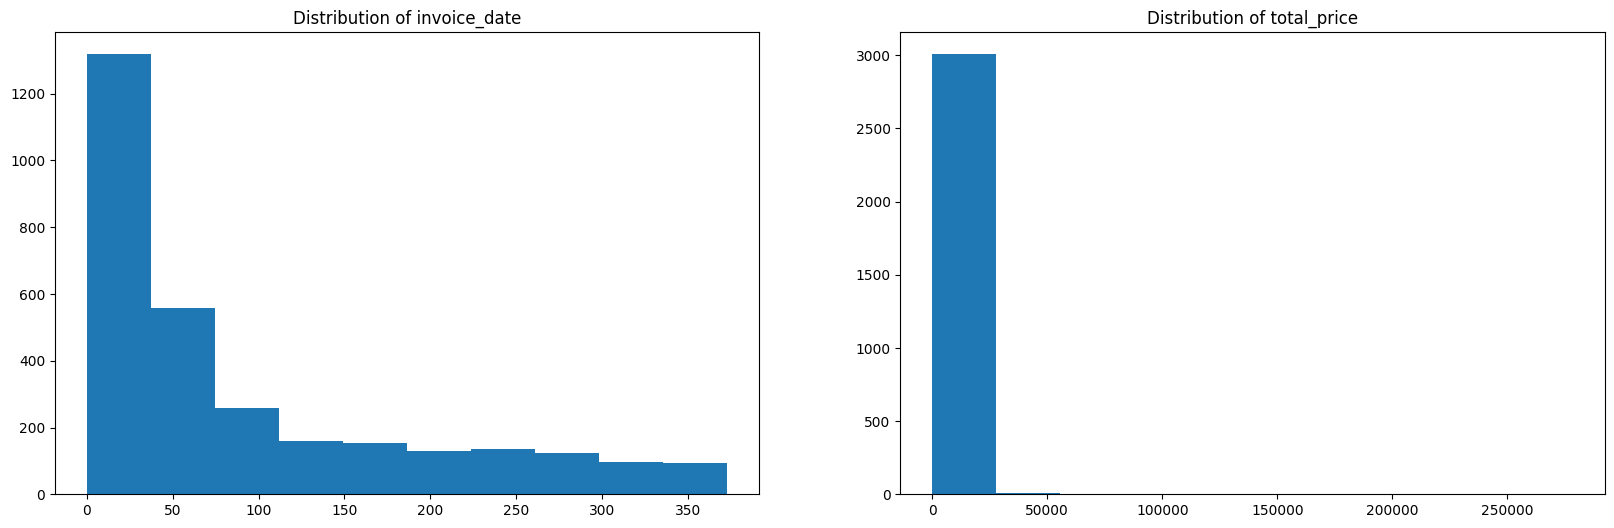

In [62]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
for col, ax in zip(numericals, axs):
    ax.hist(train[col])
    ax.set_title(f'Distribution of {col}')
plt.show()

* Normality at first glance is pretty apperant here.
* invoice_date: right_tailed, data is very normalized between 0 to 150, then uniform
* total_price: Heavily concentrated around 0

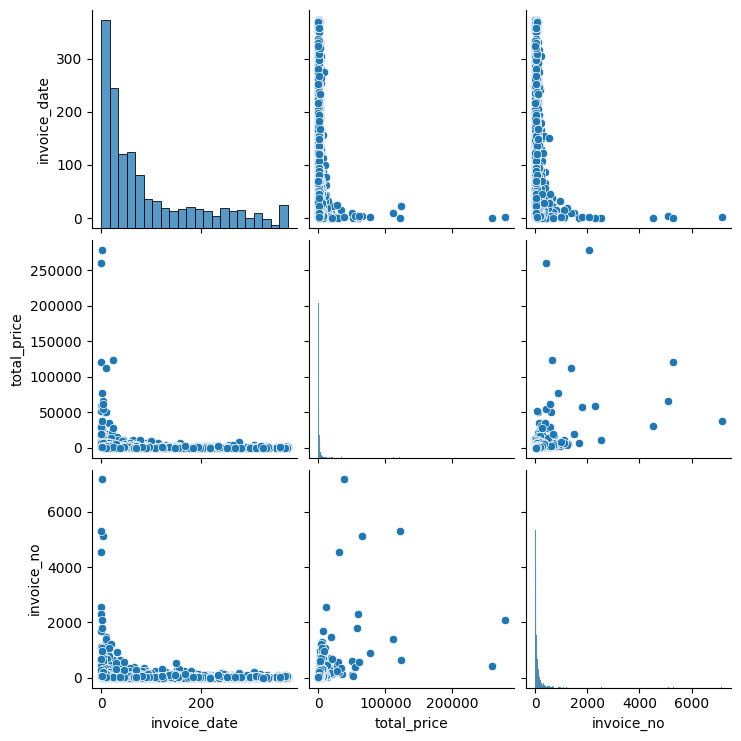

In [63]:
sns.pairplot(data=train[explore_cols])
plt.show()

initital observations on this info based on a pair plot:

* total_price and invoice_no seems to have something, but otherwise there is a concentration near zero in this data

  # We need to remove existing outliers that are in the pairplot.

  * This means I have to reevaluate the function application prepping.

In [65]:
train, val, test = w.train_val_test()

In [ ]:
train.columns

In [ ]:
scaler = MinMaxScaler()
normalize_train = scaler.fit_transform(train)

In [ ]:
normalize_train